Libraries

In [472]:
import numpy as np
import matplotlib.pyplot as plt

Dataset

In [473]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])
w = [200]
b = -100

Finding Function f_wb
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b $$

In [474]:
def fxn(x, w, b):
    m = x.shape[0]

    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(w, x[i])+b
    return (f_wb)

Finding Cost Function

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [475]:
def cost_fxn(x, y, w, b):

    m = x.shape[0]
    y_ = fxn(x, w, b)
    cost = np.sum((y_ - y)**2)/(2*m)

    return cost

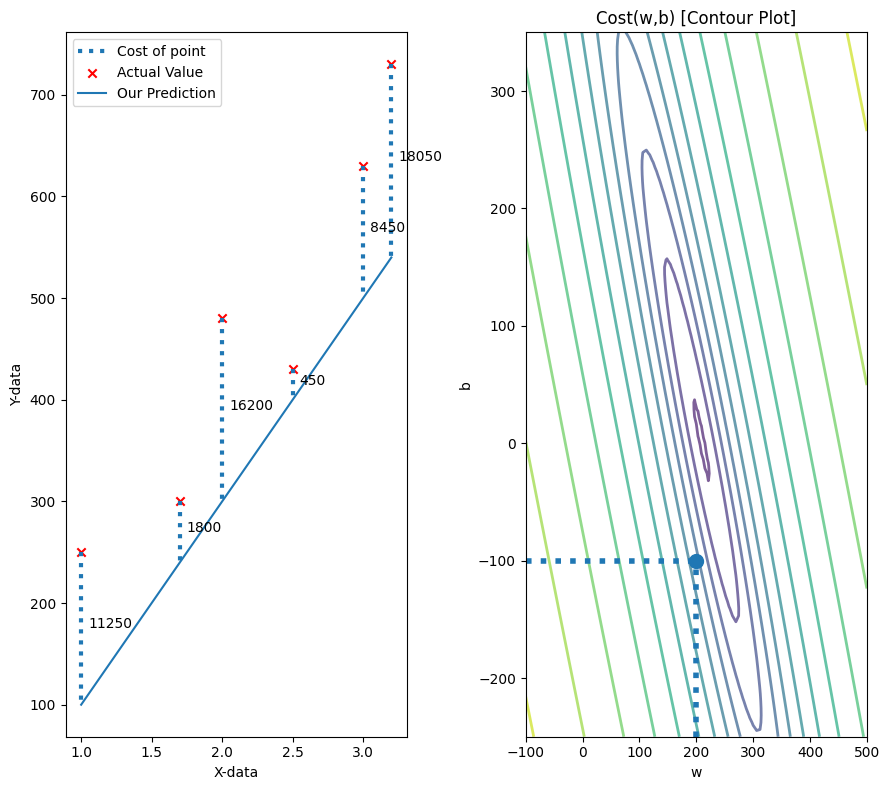

In [476]:
def plt_house_x(X, y, f_wb=None, ax=None):
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")
    ax.set_ylabel("Y-data")
    ax.set_xlabel("X-data")
    ax.plot(X, f_wb, label="Our Prediction")
    ax.legend()


def mk_cost_lines(x, y, w, b, ax):
    label = 'Cost of point'
    addedbreak = False
    for p in zip(x, y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1], f_wb_p, lw=3, ls='dotted', label=label)
        label = ''
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',
                    xytext=(5, 0), textcoords='offset points')


def plt_stationary(x_train, y_train, w0, b):
    if len(w0) == 1:
        w0 = w0[0]

        fig, ax = plt.subplots(1, 2, figsize=(9, 8))
        fig.canvas.toolbar_position = 'top'
    
        w_range = np.array([200-300., 200+300])
        b_range = np.array([50-300., 50+300])
        b_space = np.linspace(*b_range, 100)
        w_space = np.linspace(*w_range, 100)

        tmp_b, tmp_w = np.meshgrid(b_space, w_space)
        z = np.zeros_like(tmp_b)
        for i in range(tmp_w.shape[0]):
            for j in range(tmp_w.shape[1]):
                z[i, j] = cost_fxn(x_train, y_train, tmp_w[i][j], tmp_b[i][j])
                if z[i, j] == 0:
                    z[i, j] = 1e-6

        f_wb = np.dot(x_train, w0) + b
        mk_cost_lines(x_train, y_train, w0, b, ax[0])
        plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])

        CS = ax[1].contour(tmp_w, tmp_b, np.log(z), levels=12,
                           linewidths=2, alpha=0.7)
        ax[1].set_title('Cost(w,b) [Contour Plot]')
        ax[1].set_xlabel('w', fontsize=10)
        ax[1].set_ylabel('b', fontsize=10)
        ax[1].set_xlim(w_range)
        ax[1].set_ylim(b_range)
        cscat = ax[1].scatter(w0, b, s=100,
                              zorder=10, label="cost with \ncurrent w,b")
        chline = ax[1].hlines(b, ax[1].get_xlim()[0], w0,
                              lw=4, ls='dotted')
        cvline = ax[1].vlines(w0, ax[1].get_ylim()[0], b,
                              lw=4, ls='dotted')
        fig.tight_layout()
        return fig, ax, [cscat, chline, cvline]


fig, ax, dyn_items = plt_stationary(x_train, y_train, w, b)

Finding dJ/dw and dJ/db

$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
$$


In [477]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    m = x.shape[0]
    a = fxn(x, w, b) - y
    dj_dw = (np.dot(a, x))/m
    dj_db = np.sum(a)/m
    return np.array(dj_dw), dj_db

Gradient Descent

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

In [478]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    J_history = []
    p_history = []

    for i in range(num_iters+1):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b -= alpha * dj_db
        w -= alpha * dj_dw
        J_history.append(cost_fxn(x, y, w, b))
        p_history.append([w, b])
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ,w: {w}, b:{b}")

    return w, b, J_history, p_history


iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w, b, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: {w_final},{b_final}")


f_wb = fxn(x_train, w_final, b_final)
print("Cost is", cost_fxn(x_train, y_train, w_final, b_final))

Iteration    0: Cost 8.46e+03 ,w: [202.80833333], b:-98.76666666666667
Iteration 1000: Cost 1.80e+03 ,w: [223.52137552], b:-32.28296188836681
Iteration 2000: Cost 1.75e+03 ,w: [215.18089274], b:-11.838434218472974
Iteration 3000: Cost 1.74e+03 ,w: [211.7536382], b:-3.4374097221896087
Iteration 4000: Cost 1.74e+03 ,w: [210.34531761], b:0.014722492685807966
Iteration 5000: Cost 1.74e+03 ,w: [209.76661333], b:1.4332657708600276
Iteration 6000: Cost 1.74e+03 ,w: [209.52881332], b:2.0161707428604965
Iteration 7000: Cost 1.74e+03 ,w: [209.43109701], b:2.255696890289678
Iteration 8000: Cost 1.74e+03 ,w: [209.39094362], b:2.3541224966202314
Iteration 9000: Cost 1.74e+03 ,w: [209.37444387], b:2.394567350284724
Iteration 10000: Cost 1.74e+03 ,w: [209.36766383], b:2.4111868688115714
(w,b) found by gradient descent: [209.36766383],2.4111868688115714
Cost is 1735.8832116012206


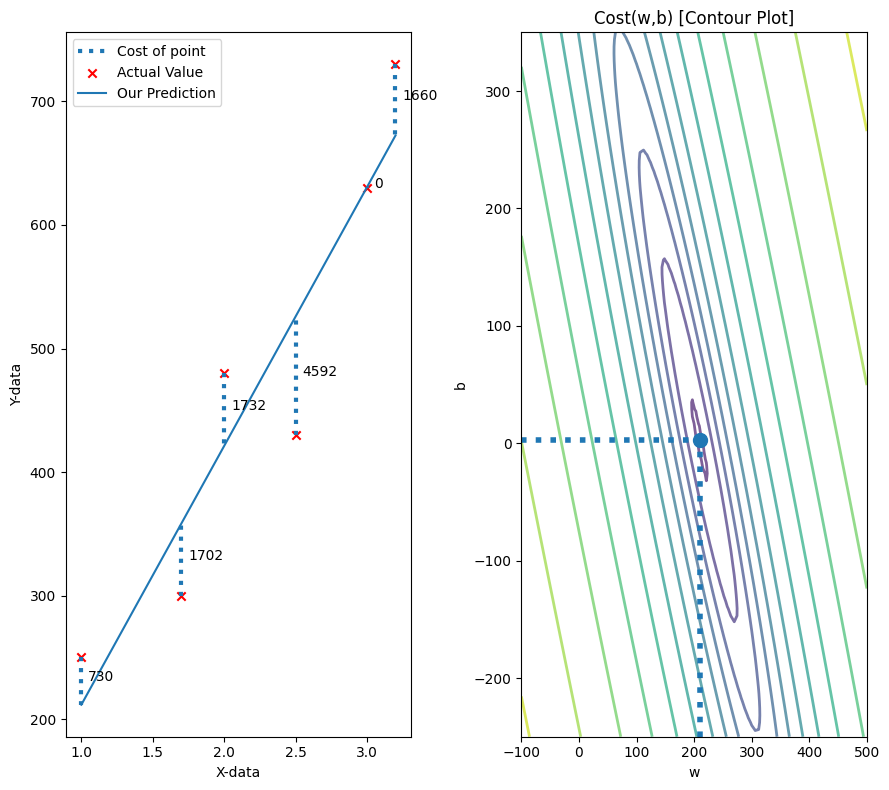

In [479]:
fig, ax, dyn_items = plt_stationary(x_train, y_train, w_final, b_final)

### Regularized Linear Regression


Finding Cost Fxn

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 

Finding dJ/dw and dJ/db

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$
